In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('winequality.csv',sep=",")

In [3]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.1,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.40,0.52,10.2,3,red
1,10.3,0.170,0.47,1.4,0.037,5.0,33.0,0.99390,2.89,0.28,9.6,3,white
2,5.8,0.240,0.44,3.5,0.029,5.0,109.0,0.99130,3.53,0.43,11.7,3,white
3,6.9,0.390,0.40,4.6,0.022,5.0,19.0,0.99150,3.31,0.37,12.6,3,white
4,7.6,0.480,0.37,1.2,0.034,5.0,57.0,0.99256,3.05,0.54,10.4,3,white


In [5]:
df.shape

(6492, 13)

In [6]:
df.isnull().sum() #não existe valores vazios, então não é necessário preencher nenhum valor

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [7]:
df.nunique() # quantidade de valores únicos de cada coluna

fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     135
total sulfur dioxide    276
density                 996
pH                      108
sulphates               111
alcohol                 111
quality                   6
type                      2
dtype: int64

In [8]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
dtype: object

In [9]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6492.000000,6492.000000,6492.000000,6492.000000,6492.000000,6492.000000,6492.000000,6492.000000,6492.000000,6492.000000,6492.000000,6492.000000
mean,7.215149,0.339698,0.318581,5.444254,0.056056,30.523105,115.744378,0.994699,3.218432,0.531319,10.490501,5.815927
std,1.296691,0.164690,0.145348,4.758579,0.035038,17.752926,56.541478,0.002997,0.160817,0.148834,1.191985,0.869114
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,8.000000


In [10]:
y=df['type'].value_counts() # a maioria dos vinhos são brancos
y

white    4893
red      1599
Name: type, dtype: int64

C:\Users\joaos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

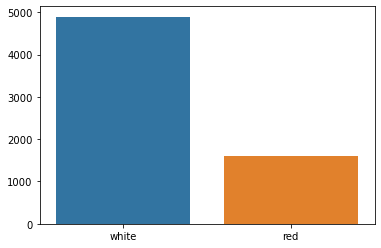

In [11]:
sns.barplot(y.index,y.values)

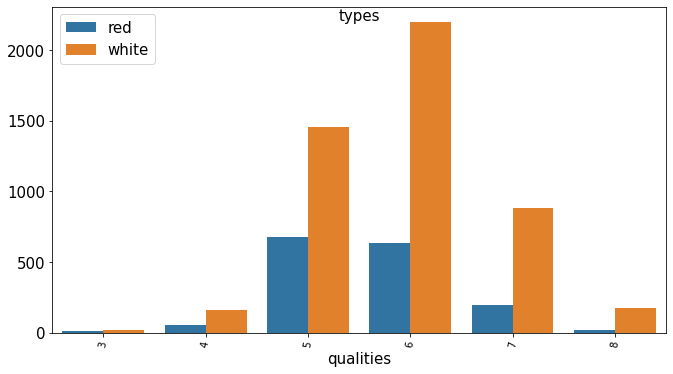

In [12]:
fig, axz=plt.subplots(figsize=(11,6))

axz=sns.countplot(x='quality',hue='type',data=df)

axz.set_ylabel('types',rotation=0,labelpad=100,size=15)
axz.yaxis.set_label_coords(0.5,.95)

axz.set_xlabel('qualities',size=15)
axz.legend(loc=2,fontsize=15)

axz.tick_params(axis='x',labelsize=10,labelrotation=80)
axz.tick_params(axis='y',labelsize=15)

Conslusão:
A maioria dos vinhos têm qualidade 5 e 6.

<AxesSubplot:>

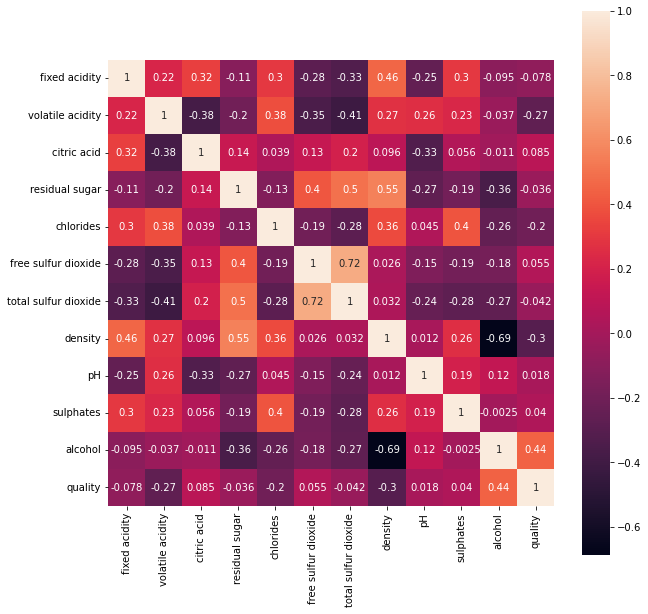

In [13]:
f, ax = plt.subplots(figsize=[10,10])
sns.heatmap(df.corr(), square=True, annot=True)

Conclusão: Sendo uma boa correlação um valor mínimo de 0.6, é possível ver que a única boa correlação existente é entre o 'free sulfur dioxide' e 'total sulfur dioxide'

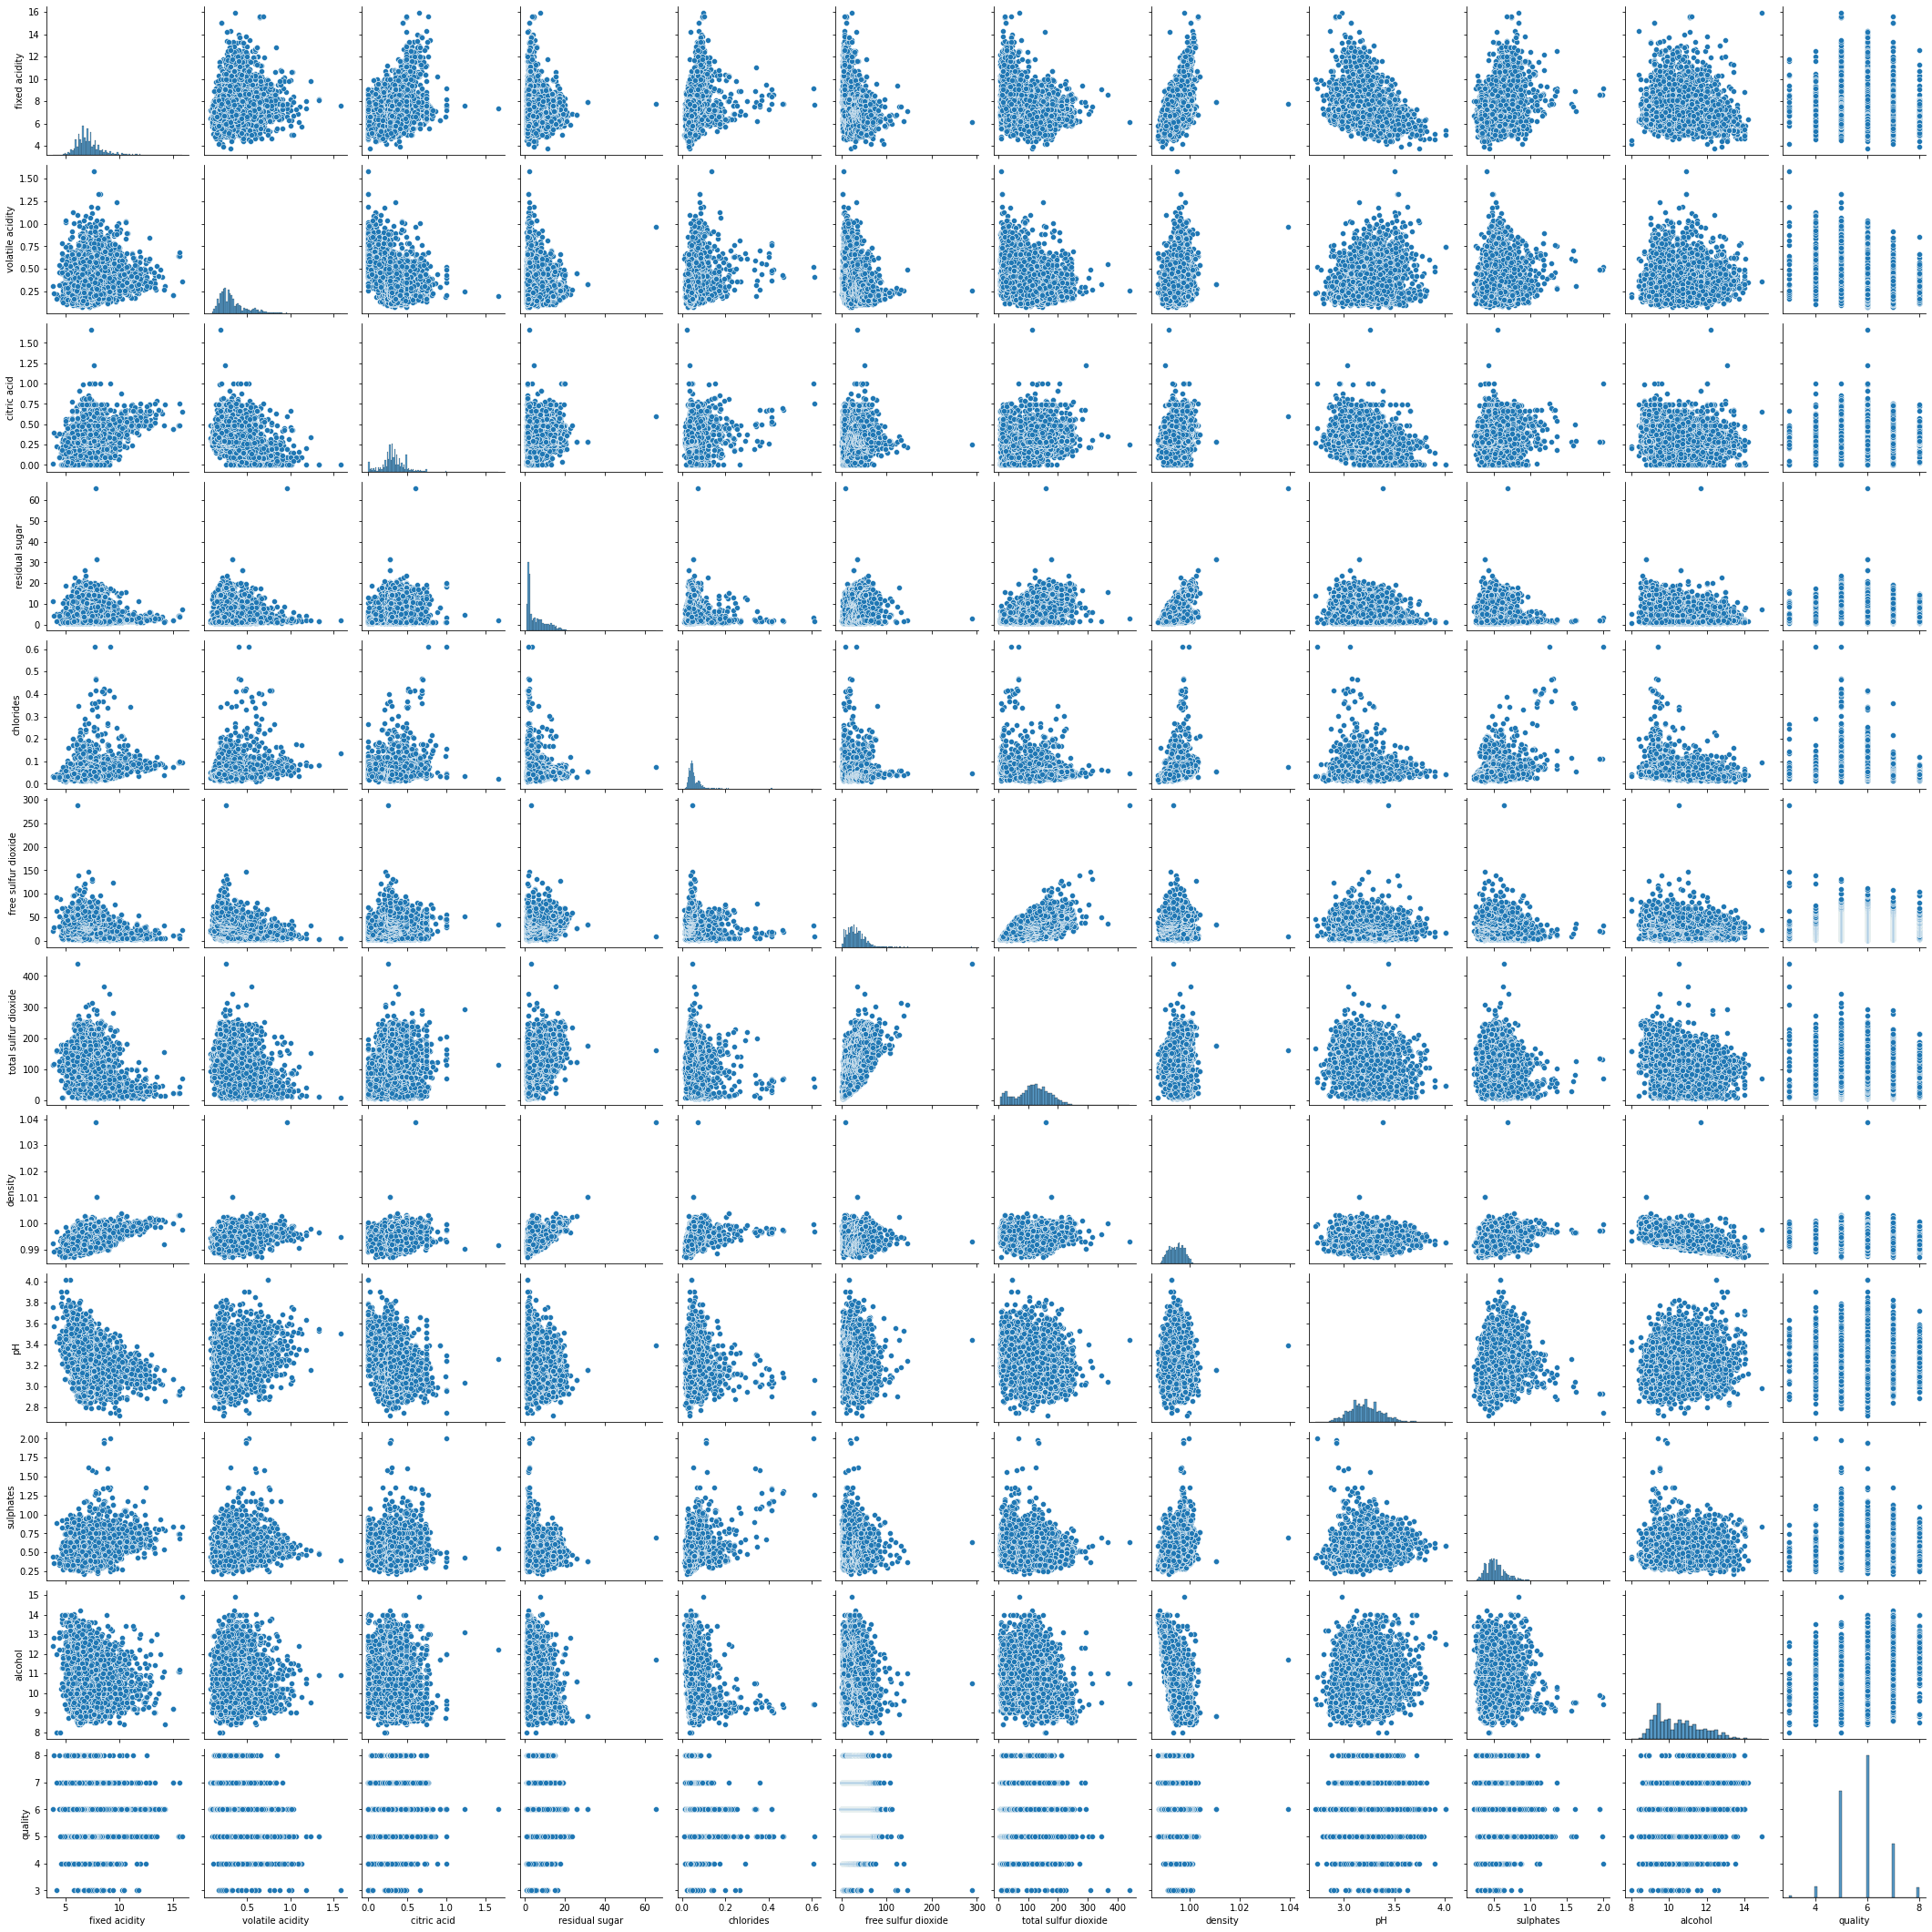

In [14]:
sns.pairplot(df) #Não existe grande correlação, ou seja, os atributos são quase independentes uns dos outros

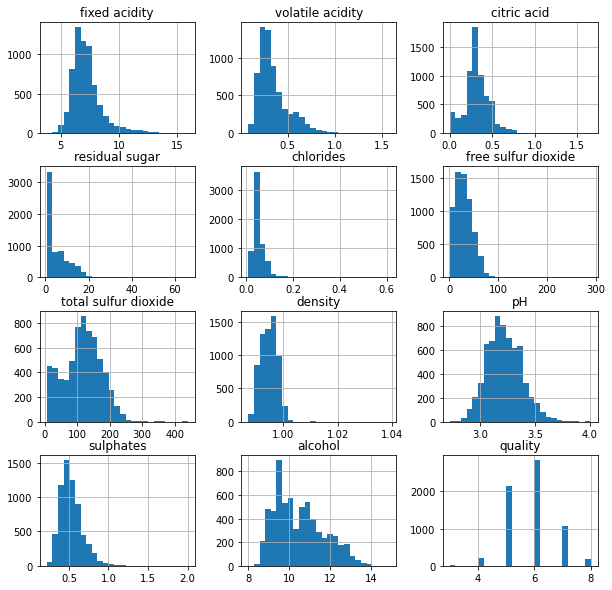

In [15]:
df.hist(bins=25, figsize=(10,10))
plt.show()
#Os graficos revelam a distribuição dos valores nas features

# Dataset division

In [16]:
dfcopy=pd.get_dummies(df,columns=['type'])

In [17]:
#Divisao para os tipos de vinho

In [18]:
df1=df.sample(frac=1)
    
train = df1[:5000]
test = df1[5000:]


In [19]:
y_train_type=train['type']
y_test_type=test['type']
X_train_type=train.drop(['type'],axis=1)
X_test_type=test.drop(['type'],axis=1)
df_features_type=df.drop(['type'],axis=1)
df_target_type=df['type']

In [20]:
#Divisão para a qualidade dos vinhos

In [21]:
X = dfcopy.drop(["quality","total sulfur dioxide"], axis=1)
y = dfcopy["quality"]
# visto que existe uma correlação com o valor de total sulfur dioxide, foi necessário eliminar essa coluna

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

# Quality Regression

In [23]:
from sklearn.preprocessing import StandardScaler
standardScaler =StandardScaler()

colunas=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

dfcopy[colunas] = standardScaler.fit_transform(dfcopy[colunas])
dfcopy

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
0,-0.088809,3.250619,-1.847999,0.053748,0.740521,-1.550461,14.0,1.127991,1.129124,-0.076054,-0.243731,3,1,0
1,2.379201,-1.030491,1.041850,-0.849952,-0.543913,-1.437795,33.0,-0.266620,-2.042431,-1.688709,-0.747131,3,0,1
2,-1.091439,-0.605416,0.835432,-0.408610,-0.772256,-1.437795,109.0,-1.134081,1.937560,-0.680799,1.014772,3,0,1
3,-0.243060,0.305458,0.560209,-0.177431,-0.972057,-1.437795,19.0,-1.067354,0.569438,-1.083963,1.769873,3,0,1
4,0.296817,0.851983,0.353791,-0.891985,-0.629541,-1.437795,57.0,-0.713696,-1.047434,0.058334,-0.075930,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6487,-1.245689,-0.787591,0.560209,-0.870969,-0.429741,2.843519,147.0,-1.534448,0.009751,2.813286,0.930872,8,0,1
6488,-1.091439,-1.030491,0.147373,-0.765887,-0.315569,3.688515,170.0,-1.451038,1.004749,2.477316,1.098672,8,0,1
6489,-1.091439,-1.030491,0.147373,-0.765887,-0.315569,3.688515,170.0,-1.451038,1.004749,2.477316,1.098672,8,0,1
6490,-0.397311,-0.605416,-0.127851,-0.335053,-0.401198,4.195513,179.0,-0.937234,-1.109621,0.394304,0.679171,8,0,1


In [24]:
dfcopy.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_red,type_white
count,6.492000e+03,6.492000e+03,6.492000e+03,6.492000e+03,6.492000e+03,6.492000e+03,6492.000000,6.492000e+03,6.492000e+03,6.492000e+03,6.492000e+03,6492.000000,6492.000000,6492.000000
mean,1.162724e-16,4.758978e-16,1.597356e-16,-2.192400e-17,-6.581817e-16,1.313388e-17,115.744378,-5.926901e-15,-3.659153e-15,-3.573338e-16,7.790715e-16,5.815927,0.246303,0.753697
std,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,56.541478,1.000077e+00,1.000077e+00,1.000077e+00,1.000077e+00,0.869114,0.430890,0.430890
min,-2.633945e+00,-1.577016e+00,-2.192028e+00,-1.018083e+00,-1.343116e+00,-1.663127e+00,6.000000,-2.532029e+00,-3.099617e+00,-2.091872e+00,-2.089534e+00,3.000000,0.000000,0.000000
25%,-6.286867e-01,-6.661413e-01,-4.718802e-01,-7.658873e-01,-5.153696e-01,-7.617982e-01,77.000000,-7.870968e-01,-6.743095e-01,-6.807993e-01,-8.310317e-01,5.000000,0.000000,1.000000
50%,-1.659347e-01,-3.017915e-01,-5.904464e-02,-5.136917e-01,-2.584828e-01,-8.580122e-02,118.000000,6.368281e-02,-5.243586e-02,-1.432477e-01,-1.598303e-01,6.000000,0.000000,1.000000
75%,3.739426e-01,3.661831e-01,4.914027e-01,5.581393e-01,2.552908e-01,5.901958e-01,156.000000,7.643248e-01,6.316251e-01,4.614978e-01,6.791713e-01,6.000000,0.000000,1.000000
max,6.698220e+00,7.531729e+00,9.229755e+00,1.268454e+01,1.583976e+01,1.456080e+01,440.000000,1.477383e+01,4.922553e+00,9.868651e+00,3.699577e+00,8.000000,1.000000,1.000000


In [25]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [26]:
def cross_val(modelo):
    pred=cross_val_score(modelo,X,y, cv=10)
    return pred.mean()

def evaluate(reais, previstos):
    mae=metrics.mean_absolute_error(reais,previstos)
    mse=metrics.mean_squared_error(reais,previstos)
    rmse=np.sqrt(metrics.mean_squared_error(reais,previstos))
    r2=metrics.r2_score(reais,previstos)
    return mae,mse,rmse,r2

def print_evaluate(reais,previstos):
    mae,mse,rmse,r2 = evaluate(reais,previstos)
    print('__________________')
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2',r2)
    print('__________________')

In [27]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [28]:
lin_reg.score(X_train,y_train)

0.2884773397339858

In [29]:
lin_reg.intercept_

106.8689232846237

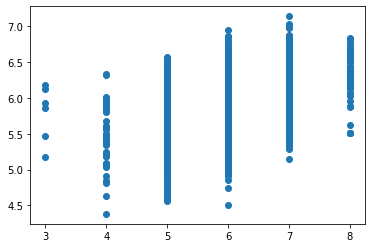

In [30]:
pred=lin_reg.predict(X_test)
plt.scatter(y_test, pred)

X - Qualidade / Y - Previsão da qualidade
O gráfico mostra um plot categórico, já que existe um valor fixo para a previsão da qualidade

<AxesSubplot:xlabel='quality', ylabel='Count'>

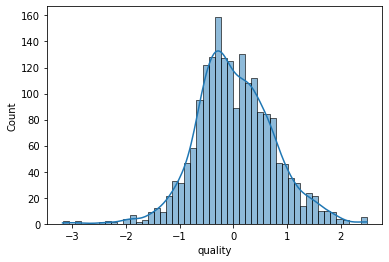

In [31]:
sns.histplot((y_test-pred),bins=50, kde=True)

Conclusão: um grande número de vinhos tem uma qualidade média

In [32]:
train_pred=lin_reg.predict(X_train)
print('Dados de treino')
print_evaluate(y_train,train_pred)

test_pred=lin_reg.predict(X_test)
print('Dados de teste')
print_evaluate(y_test,test_pred)

Dados de treino
__________________
MAE 0.573379698029268
MSE 0.5433276308796884
RMSE 0.7371076114650346
R2 0.2884773397339858
__________________
Dados de teste
__________________
MAE 0.558443241368436
MSE 0.5110918174887277
RMSE 0.7149068593101675
R2 0.3044046845709365
__________________


In [33]:
results_df=pd.DataFrame(data=[['Linear Regression',*evaluate(y_test,test_pred),cross_val(LinearRegression())]],columns=['Model','MAE','MSE','RMSE','R2','Cross Validation'])
results_df

,Model,MAE,MSE,RMSE,R2,Cross Validation
0,Linear Regression,0.558443,0.511092,0.714907,0.304405,-3.986579


Random forest regressor

In [34]:
from sklearn.ensemble import RandomForestRegressor

rf_reg=RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000)

In [35]:
rf_reg.score(X_train,y_train)

0.9306347249953273

In [36]:
train_pred=rf_reg.predict(X_train)
print('Dados de treino')
print_evaluate(y_train,train_pred)

test_pred=rf_reg.predict(X_test)
print('Dados de teste')
print_evaluate(y_test,test_pred)

Dados de treino
__________________
MAE 0.16523217429577464
MSE 0.0529681943221831
RMSE 0.23014820077980863
R2 0.9306347249953273
__________________
Dados de teste
__________________
MAE 0.42962371663244353
MSE 0.34877981262833674
RMSE 0.5905758313953736
R2 0.5253111173397951
__________________


In [37]:
results_df_2=pd.DataFrame(data=[['Random Forest Regression',*evaluate(y_test,test_pred),cross_val(RandomForestRegressor())]],columns=['Model','MAE','MSE','RMSE','R2','Cross Validation'])
results_df=results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2,Cross Validation
0,Linear Regression,0.558443,0.511092,0.714907,0.304405,-3.986579
1,Random Forest Regression,0.429624,0.348780,0.590576,0.525311,-4.551606


Conclusões: 
- MAE: Com o RFR, a diferença entre a previsão e o valor real é menor
- MSE: Visto que o MSE do LR é maior, a probabilidade de errar o valor da previsão também é maior
- R2: apesar dos dois terem valores baixos, com o RFR o dataset vai ter uma melhor reação para outro dataset com as mesmas colunas
- Cross validation: os dois modelos não irão conseguir fazer boas previsões com outros dados que não estão no dataset

In [38]:
rf_reg.feature_importances_

array([0.06465023, 0.13623041, 0.07073193, 0.07774778, 0.07203342,
       0.102348  , 0.06549584, 0.07383995, 0.07960654, 0.25425784,
       0.00150402, 0.00155403])

<AxesSubplot:>

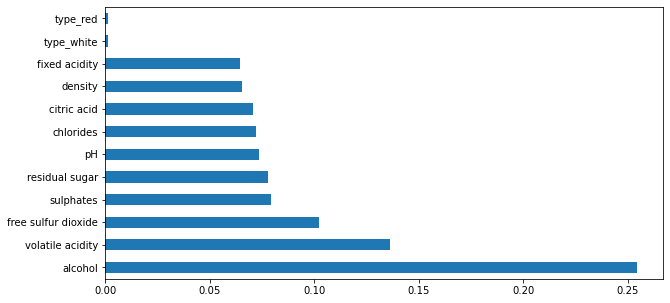

In [39]:
feat_importances = pd.Series(rf_reg.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,5))

Conclusão: A quantidade de álcool no vinho tem grande influência para a qualidade do mesmo

# DT e RF

In [40]:
results_type=[]
for i in range(20):
    
    t = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6)
    t = t.fit(X_train_type, y_train_type)
    
    results_type.append((t.score(X_train_type,y_train_type),t.score(X_test_type,y_test_type )))

results_type

[(0.9958, 0.9832439678284183),
 (0.9958, 0.9832439678284183),
 (0.9958, 0.9859249329758714),
 (0.9958, 0.9845844504021448),
 (0.9958, 0.9839142091152815),
 (0.9958, 0.9839142091152815),
 (0.9958, 0.985254691689008),
 (0.9958, 0.9845844504021448),
 (0.9958, 0.9832439678284183),
 (0.9958, 0.9845844504021448),
 (0.9958, 0.9845844504021448),
 (0.9958, 0.9859249329758714),
 (0.9958, 0.9845844504021448),
 (0.9958, 0.985254691689008),
 (0.9958, 0.9845844504021448),
 (0.9958, 0.9859249329758714),
 (0.9958, 0.9845844504021448),
 (0.9958, 0.9845844504021448),
 (0.9958, 0.9859249329758714),
 (0.9958, 0.9839142091152815)]

In [41]:
t = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
t = t.fit(X_train_type, y_train_type)

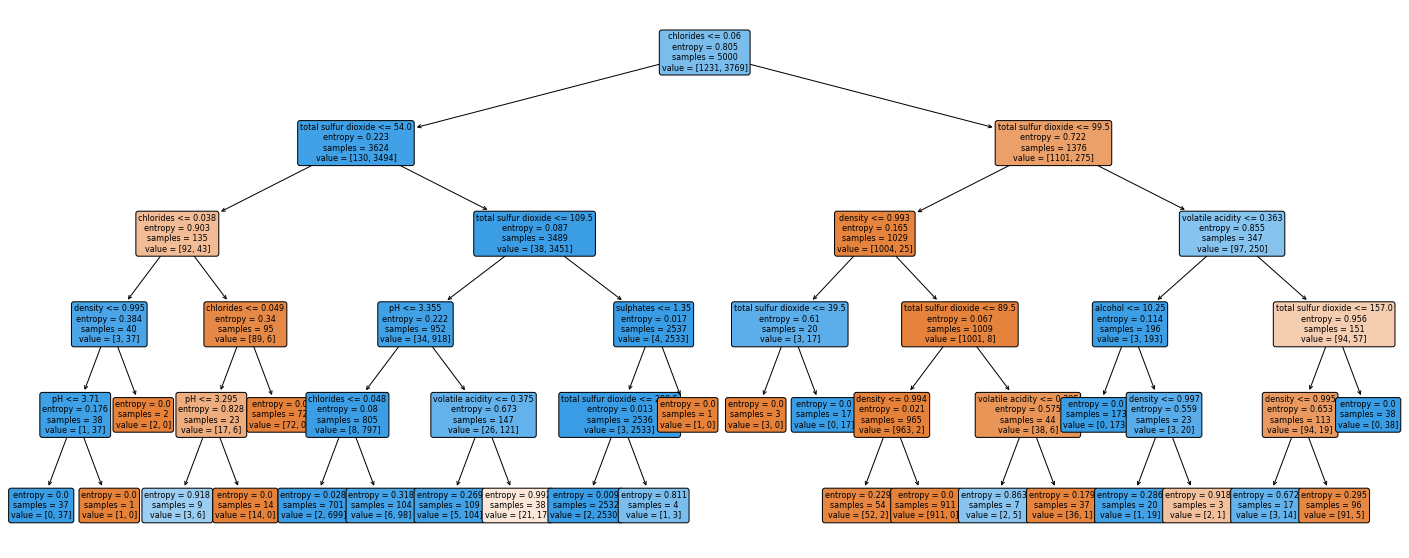

In [42]:
plt.figure(figsize=(25,10))
tree.plot_tree(t, fontsize=8, filled=True, rounded=True, feature_names=df.columns)
plt.show()

In [43]:
t.score(X_test_type,y_test_type)

0.9839142091152815

Conclusão: é possível ver que tem pouca margem de erro com os valores de teste, ou seja, ele só irá errar o tipo de vinho 1 em cada 50.

In [45]:
depth_acc=np.empty((19,3),float)
i=0
for max_d in range(1,20):
    t = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_d)
    scores=cross_val_score(t,df_features_type,df_target_type,cv=6)
    depth_acc[i,0]=max_d
    depth_acc[i,1]=scores.mean() # Previsão média
    depth_acc[i,2]=scores.std()*2 # desvio
    i+=1

depth_acc

array([[ 1.        ,  0.89325323,  0.08770952],
       [ 2.        ,  0.94562539,  0.08338727],
       [ 3.        ,  0.96303142,  0.05601482],
       [ 4.        ,  0.97335182,  0.037098  ],
       [ 5.        ,  0.97381392,  0.04407468],
       [ 6.        ,  0.97427603,  0.03672775],
       [ 7.        ,  0.97335182,  0.04058717],
       [ 8.        ,  0.97443007,  0.03612195],
       [ 9.        ,  0.97566235,  0.03688633],
       [10.        ,  0.97396796,  0.03908625],
       [11.        ,  0.97319778,  0.03595341],
       [12.        ,  0.9719655 ,  0.03602724],
       [13.        ,  0.97150339,  0.04009311],
       [14.        ,  0.97335182,  0.03463715],
       [15.        ,  0.97150339,  0.03695959],
       [16.        ,  0.97227357,  0.04042668],
       [17.        ,  0.97473814,  0.03311159],
       [18.        ,  0.97165742,  0.03828028],
       [19.        ,  0.97057917,  0.04202099]])

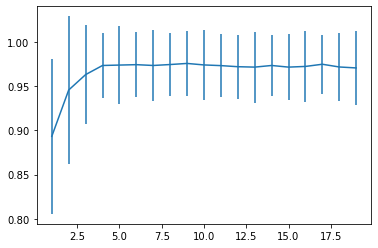

In [46]:
fig, ax=plt.subplots()
ax.errorbar (depth_acc[:,0],depth_acc[:,1],depth_acc[:,2])
plt.show()

Conclusão: à medida que ele repete a DT, a margem de erro é menor

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
clf=RandomForestClassifier(max_depth=6, random_state=0)
clf.fit(X_train_type,y_train_type)

RandomForestClassifier(max_depth=6, random_state=0)

In [49]:
clf.score(X_test_type,y_test_type)

0.9973190348525469

Conclusão: Após o treino, o resultado de teste foi quase perfeito com o RandomForestClassifier

# SVC

In [50]:
from sklearn.svm import SVC
clf_svm_type = SVC() #para classificação

In [51]:
score=cross_val_score(clf_svm_type,X_train_type,y_train_type, scoring='accuracy',cv=5,n_jobs=-1)
score

array([0.939, 0.949, 0.931, 0.918, 0.923])

In [52]:
score.mean()

0.932

In [53]:
svc_model=clf_svm_type.fit(X_train_type,y_train_type)
svc_model.score(X_train_type, y_train_type)

0.9324

In [54]:
y_pred_type=svc_model.predict(X_test_type)

y_real=test['type']
svc_model.score(X_test_type, y_test_type)

0.9483914209115282

<AxesSubplot:>

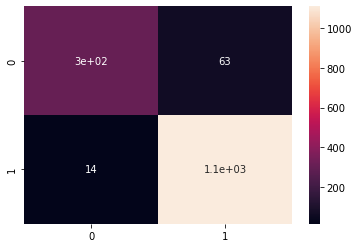

In [55]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_real,y_pred_type)
sns.heatmap(cm,annot=True)